Text(0.5, 1.0, 'Available Kernels')

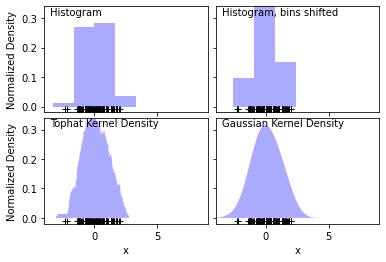

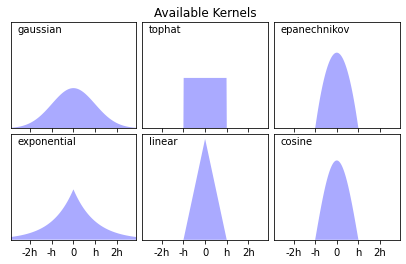

In [97]:
# Author: Jake Vanderplas <jakevdp@cs.washington.edu>
#
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats 
from sklearn.neighbors import KernelDensity
from sklearn.utils.fixes import parse_version
from numpy.random import default_rng


rng = default_rng(0)
# `normed` is being deprecated in favor of `density` in histograms
if parse_version(matplotlib.__version__) >= parse_version('2.1'):
    density_param = {'density': True}
else:
    density_param = {'normed': True}

# ----------------------------------------------------------------------
# Plot the progression of histograms to kernels
np.random.seed(1)
N = 100
X = rng.standard_normal(size=(N, 1))
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
bins = np.linspace(-5, 10, 10)

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.05, wspace=0.05)

# histogram 1
ax[0, 0].hist(X[:, 0], bins=bins, fc='#AAAAFF', **density_param)
ax[0, 0].text(-3.5, 0.31, "Histogram")

# histogram 2
ax[0, 1].hist(X[:, 0], bins=bins + 0.75, fc='#AAAAFF', **density_param)
ax[0, 1].text(-3.5, 0.31, "Histogram, bins shifted")

# tophat KDE
kde = KernelDensity(kernel='tophat', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 0].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1, 0].text(-3.5, 0.31, "Tophat Kernel Density")

# Gaussian KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 1].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1, 1].text(-3.5, 0.31, "Gaussian Kernel Density")

for axi in ax.ravel():
    axi.plot(X[:, 0], np.full(X.shape[0], -0.01), '+k')
    axi.set_xlim(-4, 9)
    axi.set_ylim(-0.02, 0.34)

for axi in ax[:, 0]:
    axi.set_ylabel('Normalized Density')

for axi in ax[1, :]:
    axi.set_xlabel('x')

# ----------------------------------------------------------------------
# Plot all available kernels
X_plot = np.linspace(-6, 6, 1000)[:, None]
X_src = np.zeros((1, 1))

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)


def format_func(x, loc):
    if x == 0:
        return '0'
    elif x == 1:
        return 'h'
    elif x == -1:
        return '-h'
    else:
        return '%ih' % x

for i, kernel in enumerate(['gaussian', 'tophat', 'epanechnikov',
                            'exponential', 'linear', 'cosine']):
    axi = ax.ravel()[i]
    log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(X_plot)
    axi.fill(X_plot[:, 0], np.exp(log_dens), '-k', fc='#AAAAFF')
    axi.text(-2.6, 0.95, kernel)

    axi.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    axi.xaxis.set_major_locator(plt.MultipleLocator(1))
    axi.yaxis.set_major_locator(plt.NullLocator())

    axi.set_ylim(0, 1.05)
    axi.set_xlim(-2.9, 2.9)

ax[0, 1].set_title('Available Kernels')


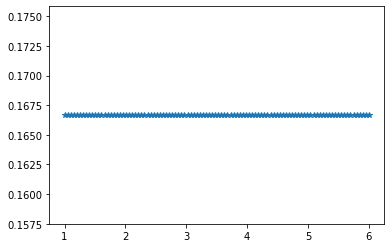

In [36]:
import matplotlib.pyplot as plt 
import numpy as np 
from scipy import stats
  
x = np.linspace(1, 6, 100) 
# Varying positional arguments 
y1 = uniform.pdf(x, 1, 6) 
plt.plot(x, y1, "*") 

<ipython-input-70-b869481126d1>:5: DeprecationWarning: This function is deprecated. Please call randint(1, 6 + 1) instead
  X = np.random.random_integers(1, 6, 1000)


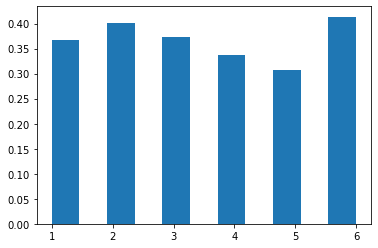

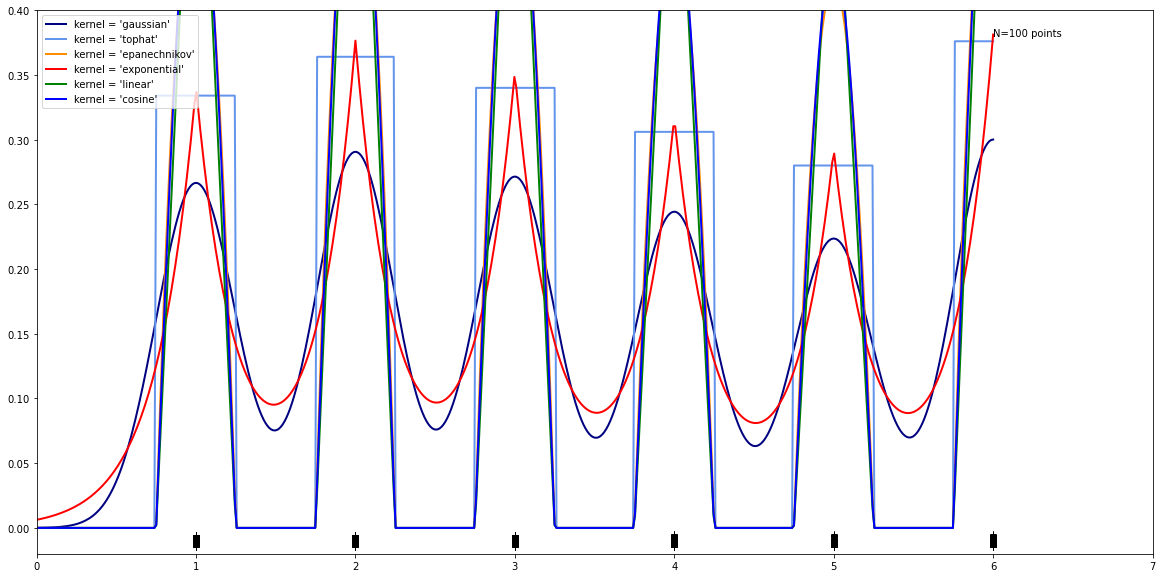

In [70]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.RandomState()
X = np.random.random_integers(1, 6, 1000)

count, bins, ignored = plt.hist(X, 11, density=True)
plt.show()

fig, ax = plt.subplots( figsize=(20, 10))

colors = ['navy', 'cornflowerblue', 'darkorange', 'red', 'green', 'blue']
kernels = ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']
lw = 2

for color, kernel in zip(colors, kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=0.25).fit(X[:, None])
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), color=color, lw=lw,
            linestyle='-', label="kernel = '{0}'".format(kernel))

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-0, 7)
ax.set_ylim(-0.02, 0.4)
plt.show()


In [2]:
import pandas as pd
data = pd.read_csv('C:\\Users\\Airton\\Desktop\\mba\\Kernel Density Estimation\\TradesPorSemana.CSV', delimiter=";")
data = data.fillna(0)
print(type(data))
data.info()

data.head(5)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rótulos de Linha  45 non-null     object 
 1   B3SA3             45 non-null     float64
 2   BBAS3             45 non-null     float64
 3   BBDC4             45 non-null     float64
 4   ITSA4             45 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.9+ KB


Rótulos de Linha  B3SA3  BBAS3  BBDC4  ITSA4
0       06/07/2020  -63.0  -80.0  360.0 -220.0
1       13/07/2020 -366.0  401.0 -123.0  261.0
2       20/07/2020  356.0 -280.0  238.0  626.0
3       27/07/2020    0.0    0.0 -511.0 -172.0
4       03/08/2020 -264.0 -320.0  180.0  644.0

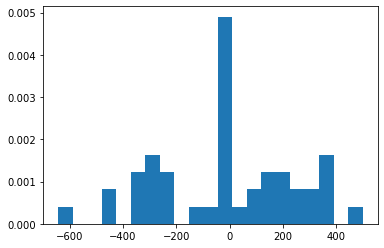

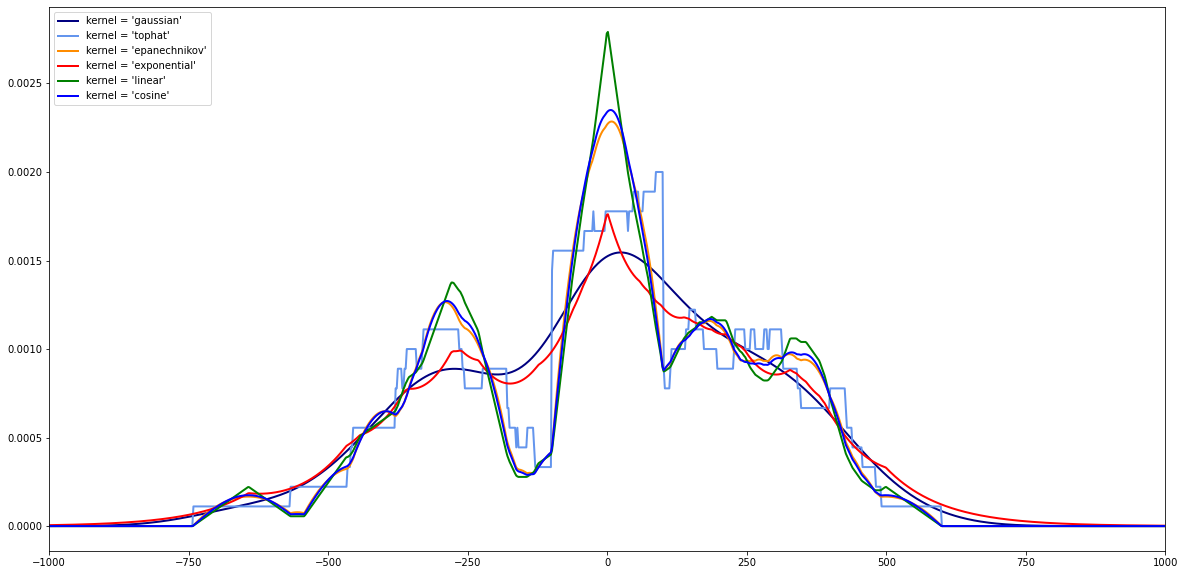

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

for stock in ["B3SA3"]:
    X = data[stock].to_numpy()
    X_plot = np.linspace(-1000, 1000, 1000)[:, None]

    count, bins, ignored = plt.hist(X, 21, density=True)
    plt.show()

    fig, ax = plt.subplots( figsize=(20, 10))

    colors = ['navy', 'cornflowerblue', 'darkorange', 'red', 'green', 'blue']
    kernels = ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']
    lw = 2

    for color, kernel in zip(colors, kernels):
        kde = KernelDensity(kernel=kernel, bandwidth=100).fit(X[:, None])
        log_dens = kde.score_samples(X_plot)
        ax.plot(X_plot[:, 0], np.exp(log_dens), color=color, lw=lw,
                linestyle='-', label="kernel = '{0}'".format(kernel))

    #ax.text(6, 0.38, "N={0} points".format(N))

    ax.legend(loc='upper left')
    #ax.plot(X[:], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

    ax.set_xlim(-1000, 1000)
    #ax.set_ylim(-0.02, 0.4)
    plt.show()